# Machine Learning with PyTorch and Scikit-Learn  

In [1]:
import sys
sys.path.insert(0, '..')

# Chapter 4 - Building Good Training Datasets – Data Preprocessing

> The quality of the data and the amount of useful information that it contains are key factors that determine how well a machine learning algorithm can learn. Therefore, it is absolutely critical to ensure that we examine and preprocess a dataset before we feed it to a machine learning algorithm

The topics that we will cover in this chapter are as follows: 

 • Removing and imputing missing values from the dataset 

 • Getting categorical data into shape for machine learning algorithms 

 • Selecting relevant features for the model construction

## Identifying missing values in tabular data

- It is common in real-world applications for our training examples to be missing one or more values for various reasons. 

- There could have been an error in the data collection process, certain measurements may not be applicable, or particular fields could have been simply left blank in a survey, for example.

- We will see several methods for dealing with missing values. 

## Identifying missing values in tabular data

Reading data from a file

In [2]:
import pandas as pd
from io import StringIO

data = "1, abc , 2\n 3, xxx, 4"
StringIO(data)

df = pd.read_csv(StringIO(data))
df

,1,abc,2
0,3,xxx,4


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
import pandas as pd
from io import StringIO  # StringIO is a class that allows us to read a string as a file
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:

if (sys.version_info < (3, 0)):
    csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


- **isnull** method return a DataFrame with Boolean values that indicate whether a cell contains a numeric value (False) or if data is missing (True). Using the sum method, we can then return the number of missing values per column as follows:

In [5]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

> Although scikit-learn was originally developed for working with NumPy arrays only, it can sometimes be more convenient to preprocess data using pandas’ DataFrame. Nowadays, most scikit-learn functions support DataFrame objects as inputs, but since NumPy array handling is more mature in the scikit-learn API, it is recommended to use NumPy arrays when possible.

You can always access the underlying NumPy array of a DataFrame via the values attribute before you feed it into a scikit-learn estimator:

In [6]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
# access the underlying NumPy array
# via the `values` attribute
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

Rather than Dataframe:

In [8]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


## Eliminating training examples or features with missing values

- One of the easiest ways to deal with missing data is simply to remove the corresponding features (columns) or training examples (rows) from the dataset entirely

- rows with missing values can easily be dropped via the dropna method:

In [9]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [10]:
# remove rows that contain missing values

df.dropna(axis= "index")

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [11]:
# remove columns that contain missing values

df.dropna(axis= "columns")

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [12]:
# only drop rows where all columns are NaN

df.dropna(how='all')  

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [13]:
# drop rows that have fewer than 3 real values 

df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [14]:
# only drop rows where NaN appear in specific columns (here: 'C')

df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


- Although the removal of missing data seems to be a convenient approach, it also comes with certain disadvantages; 

- For example, we may end up removing too many samples, which will make a reliable analysis impossible. 

- Or, if we remove too many feature columns, we will run the risk of losing valuable information that our classifier needs to discriminate between classes. 
  
- Alternatively, we can use best way : interpolation techniques

## Imputing missing values

- we can use different interpolation techniques to estimate the missing values from the other training examples in our dataset. 

- One of the most common interpolation techniques is **mean imputation**, where we simply replace the missing value with the mean value of the entire feature column. 

- A convenient way to achieve this is by using the **SimpleImputer** class from scikit-learn

In [15]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [16]:
# again: our original array
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

We replaced each NaN value with the corresponding mean, which is separately calculated for each feature column.

In [17]:
# impute missing values via the column mean

from sklearn.impute import SimpleImputer
import numpy as np

im_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
im_mean = im_mean.fit(df.values)
imputed_data = im_mean.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [18]:
# impute missing values via the column mean

from sklearn.impute import SimpleImputer
import numpy as np

im_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data = im_mean.fit_transform(df.values) 
# fit_transform is a combination of fit and transform
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

- Alternatively, an even more convenient way to impute missing values is by using pandas’ fillna method and providing an imputation method as an argument.

In [19]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [20]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


There are more variant for imputation using Pandas fillna method

## Understanding the scikit-learn estimator API

Sklearn [APIs](https://scikit-learn.org/stable/modules/classes.html)

- **sklearn.cluster:** Clustering: The sklearn.cluster module gathers popular unsupervised clustering algorithms.

- **sklearn.datasets:** Datasets, The sklearn.datasets module includes utilities to load datasets, including methods to load and fetch popular reference datasets. It also features some artificial data generators.

- **sklearn.dummy:** Dummy estimators: 

- **sklearn.ensemble:** Ensemble Methods, The sklearn.ensemble module includes ensemble-based methods for classification, regression and anomaly detection.

- **sklearn.feature_extraction:** Feature Extraction, The sklearn.feature_extraction module deals with feature extraction from raw data. It currently includes methods to extract features from text and images.

- **sklearn.feature_selection:** Feature Selection, The sklearn.feature_selection module implements feature selection algorithms. It currently includes univariate filter selection methods and the recursive feature elimination algorithm.

- s**klearn.impute**: Impute, Transformers for missing value imputation

- **sklearn.linear_model:** Linear Models, The sklearn.linear_model module implements a variety of linear models.

- **sklearn.metrics:** Metrics, The sklearn.metrics module includes score functions, performance metrics and pairwise metrics.

- **sklearn.model_selection:** Model Selection, The sklearn.model_selection module implements model selection and cross-validation procedures.

- **sklearn.multiclass:** Multiclass classification, The sklearn.multiclass module implements utilities for multiclass classification.
  

What is a module?

In [21]:
import math_module

In [22]:
math_module.add_numbers(1, 2)

3

In [23]:
from math_module import add_numbers

add_numbers(1,2)

3

In [24]:
import sklearn.datasets 
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### Estimator API



The scikit-learn estimator API is a set of methods that are common to all scikit-learn estimators.

<center>

![](2022-08-13-12-23-08.png)

</center>

The two essential methods of those estimators are fit and transform. 

- The **fit method** is used to learn the parameters from the training data, 

- The **transform method** uses those parameters to transform the data. 

- Any data array that is to be transformed needs to have the same number of features as the data array that was used to fit the model.

<center>

![](2022-08-13-12-30-51.png)
![](2022-08-13-12-31-52.png)

</center>


Inpute API:

In [25]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [26]:
from sklearn.impute import SimpleImputer
import numpy as np

im_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
im_mean = im_mean.fit(df.values)
imputed_data = im_mean.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

Estimator API 

- Estimators have the predict method, but can also have a transform method, as you will see later in this chapter. As you may recall, we also used the fit method to learn the parameters of a model when we trained those estimators for classification.


<center>

<img alt="Text generation" width="400" caption="Generating text from an input sequence by adding a new word to the input at each step" src="2022-08-13-12-42-16.png" id="text-generation"/> 

</center>




In [27]:
# Download the dataset
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y) #shuffle = TRUE by default

from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=10, random_state=1, penalty = "l1") # create the model object with the default parameters (eta0=0.1)

ppn.fit(X_train, y_train) #fit the model to the training data

y_pred = ppn.predict(X_test) # predict the labels on the test set

print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 5


# Handling categorical data

- We have seen numerical values. But real-world datasets to contain one or more categorical feature columns. 

- When we are talking about categorical data, there is ordinal and nominal features. 

- **Ordinal features** can be understood as categorical values that can be sorted or ordered. For example, t-shirt size would be an ordinal feature, because we can define an order: XL > L > M. 

- In contrast, **nominal features** don’t imply any order; we could think of t-shirt color as a nominal feature since it typically doesn’t make sense to say that, for example, red is larger than blue

## Categorical data encoding with pandas

Let create a dataset with Nominal and ordinal features

In [28]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


The learning algorithms for classification that we discuss in this book do not use ordinal information in class labels.

## Mapping ordinal features

To make sure that the learning algorithm interprets the ordinal features correctly, we need to convert the categorical string values into integer

- First, we have to define the mapping manually. 

- In the following simple example, let’s assume that we know the numerical difference between features, for example, XL = L + 1 = M + 2:

In [29]:
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [30]:
# create a dictionary with the mapping
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

#map : Map values of Series according to an input mapping or function.
#map accepts a dict or a Series. Values that are not found in the dict are converted to NaN

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


If we want to transform the integer values back to the original string representation at a later stage, we can simply define a reverse-mapping dictionary, inv_size_mapping = {v: k for k, v in size_ mapping.items()}, which can then be used via the pandas map method on the transformed feature column and is similar to the size_mapping dictionary that we used previously. We can use it as follows:

In [31]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
inv_size_mapping

{3: 'XL', 2: 'L', 1: 'M'}

In [32]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

## Encoding class labels

- Many machine learning libraries require that class labels are encoded as integer values. 

- Although most estimators for classification in scikit-learn convert class labels to integers internally, it is considered good practice to provide class labels as integer arrays to avoid technical glitches. 

- To encode the class labels, we can use an approach similar to the mapping of ordinal features discussed previously. 

- We need to remember that class labels are not ordinal, and it doesn’t matter which integer number we assign to a particular string label. Thus, we can simply enumerate the class labels, starting at 0:

In [33]:
np.unique(df['classlabel'])

array(['class1', 'class2'], dtype=object)

In [34]:
enumerate(np.unique(df['classlabel']))

In [35]:
next(enumerate(np.unique(df['classlabel'])))

(0, 'class1')

In [36]:
import numpy as np

# create a mapping dict
# to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

Next, we can use the mapping dictionary to transform the class labels into integers:

In [37]:
# to convert class labels from strings to integers
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


or do mapping manually:

In [38]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [39]:
class_mapping2 = {'class1': 0,
                'class2': 1}

df['classlabel'] = df['classlabel'].map(class_mapping2)

df                      

,color,size,price,classlabel
0,green,M,10.1,1
1,red,L,13.5,0
2,blue,XL,15.3,1


In [40]:
# reverse the class label mapping
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


## Sklearn Encoder 

There is a convenient LabelEncoder class directly implemented in scikit-learn to achieve this encoding:

In [41]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [42]:
df['classlabel']

0    class2
1    class1
2    class2
Name: classlabel, dtype: object

In [43]:
from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

To transform the integer class labels back into their original string representation:

In [44]:
# reverse mapping
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

> Remember that class labels are not ordinal, and LabelEncoder does not do any sort of ordering.So, it can not be use for ordinal features in your dataset

## Performing one-hot encoding on nominal features

- Mapping ordinal features section, we used a simple dictionary mapping approach to convert the ordinal size feature into integers. 

- Since scikit-learn’s estimators for classification treat class labels as categorical data that does not imply any order (nominal), we used the convenient LabelEncoder to encode the string labels into integers. 
  
- We could use a similar approach to transform the nominal color column of our dataset, as follows:

In [45]:
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [46]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X


array([[1, 'M', 10.1],
       [2, 'L', 13.5],
       [0, 'XL', 15.3]], dtype=object)

Now : blue = 0 • green = 1 • red = 2

> If we stop at this point and feed the array to our classifier, we will make one of the most common mistakes in dealing with categorical data. Although the color values don’t come in any particular order, common classification models, will now assume that green is larger than blue, and red is larger than green. Although this assumption is incorrect, a classifier could still produce useful results. However, those results would not be optimal

Solution: A common workaround for this problem is to use a technique called one-hot encoding

![](2022-08-13-13-38-14.png)

In [47]:
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [48]:
X[:, 0].reshape(-1, 1)

array([[1],
       [2],
       [0]], dtype=object)

In [49]:
a = np.array([[1, 2, 3], [1,3,5]])

a.reshape(-1, 2)

array([[1, 2],
       [3, 1],
       [3, 5]])

In [50]:
X[:, 0].reshape(-1, 1)

array([[1],
       [2],
       [0]], dtype=object)

In [51]:
a.shape

(2, 3)

In [52]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

- We applied the OneHotEncoder to only a single column, (X[:, 0].reshape(-1, 1)), to avoid modifying the other two columns in the array as well. If we want to selectively transform columns in a multi-feature array, we can use the ColumnTransformer, which accepts a list of (name, transformer, column(s)) tuples as follows:

It is very common to want to perform different data preparation techniques on different columns in your input data.

In [53]:
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [54]:
from sklearn.compose import ColumnTransformer 
#Applies transformers to columns of an array or pandas DataFrame.


X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(), [0,1]),
                               ('nothing', 'passthrough', [2])])
c_transf.fit_transform(X)

array([[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 10.1],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 13.5],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.3]], dtype=object)

In the preceding code example, we specified that we want to modify only the first column and leave the other two columns untouched via the 'passthrough' argument.

In [55]:
from sklearn.compose import ColumnTransformer 
#Applies transformers to columns of an array or pandas DataFrame.


X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(), [0,1]),
                               ('nothing', 'passthrough', [2])])
c_transf.fit_transform(X)

array([[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 10.1],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 13.5],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.3]], dtype=object)

An even more convenient way to create those dummy features via one-hot encoding is to use the get_dummies method implemented in pandas. Applied to a DataFrame, the get_dummies method will only convert string columns and leave all other columns unchanged:

In [56]:
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [57]:
# one-hot encoding via pandas

pd.get_dummies(df[['price', 'color', 'size']])

,price,color_blue,color_green,color_red,size_L,size_M,size_XL
0,10.1,0,1,0,0,1,0
1,13.5,0,0,1,1,0,0
2,15.3,1,0,0,0,0,1


- When we are using one-hot encoding datasets, we have to keep in mind that this introduces multicollinearity, which can be an issue for certain methods (for instance, methods that require matrix inversion). 

- If features are highly correlated, matrices are computationally difficult to invert, which can lead to numerically unstable estimates. 

- To reduce the correlation among variables, we can simply remove one feature column from the one-hot encoded array. 

- Note that we do not lose any important information by removing a feature column, though; for example, if we remove the column color_blue, the feature information is still preserved since if we observe color_green=0 and color_red=0, it implies that the observation must be blue

In [58]:
# multicollinearity guard in get_dummies

pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,color_green,color_red,size_M,size_XL
0,10.1,1,0,1,0
1,13.5,0,1,0,0
2,15.3,0,0,0,1


In order to drop a redundant column via the OneHotEncoder, we need to set drop='first' and set categories='auto' as follows:

In [59]:
# multicollinearity guard for the OneHotEncoder

c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(categories='auto', drop='first'), [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X)

array([[1.0, 0.0, 'M', 10.1],
       [0.0, 1.0, 'L', 13.5],
       [0.0, 0.0, 'XL', 15.3]], dtype=object)

## Optional: Encoding Ordinal Features

If we are unsure about the numerical differences between the categories of ordinal features, or the difference between two ordinal values is not defined, we can also encode them using a threshold encoding with 0/1 values. For example, we can split the feature "size" with values M, L, and XL into two new features "x > M" and "x > L". Let's consider the original DataFrame:

In [60]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


We can use the `apply` method of pandas' DataFrames to write custom lambda expressions in order to encode these variables using the value-threshold approach:

In [61]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)

del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


# Partitioning a dataset into a seperate training and test set


<center>

<img alt="Text generation" width="800" caption="Generating text from an input sequence by adding a new word to the input at each step" src="2022-08-14-07-52-16.png" id="text-generation"/> 

</center>



In [62]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Randomly splitting a dataset using Sklearn

A convenient way to randomly partition this dataset into separate test and training datasets is to use the train_test_split function from scikit-learn’s model_selection submodule:

In [63]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
# we assigned the NumPy array to the variable X and 
# we assigned the class labels from the first column to the variable y. 

#function to randomly split X and y into separate training and test datasets.
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.25, 
                     random_state=0, 
                     stratify=y)

In [64]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [65]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [66]:
pd.DataFrame(X_test).columns

RangeIndex(start=0, stop=13, step=1)

In [67]:
y_train_pd = pd.DataFrame(y_train)

In [68]:
y_test_pd = pd.DataFrame(y_test)

## Choosing an appropriate ratio for partitioning a dataset

- Dividing a dataset into training and test datasets is all about balancing this tradeoff. 

- In practice, the most commonly used splits are 60:40, 70:30, or 80:20, depending on the size of the initial dataset. 

- However, for large datasets, 90:10 or 99:1 splits are also common and appropriate. For example, if the dataset contains more than 100,000 training examples, it might be fine to withhold only 10,000 examples for testing in order to get a good estimate of the generalization performance.


<center>

<img alt="Text generation" width="300" caption="Generating text from an input sequence by adding a new word to the input at each step" src="2022-08-13-14-23-00.png" id="text-generation"/> 

</center>

> Moreover, instead of discarding the allocated test data after model training and evaluation, it is a common practice to retrain a classifier on the entire dataset, as it can improve the predictive performance of the model. While this approach is generally recommended, it could lead to worse generalization performance if the dataset is small and the test dataset contains outliers, for example. Also, after refitting the model on the whole dataset, we don’t have any independent data left to evaluate its performance

ML explain : https://mlu-explain.github.io/train-test-validation/

# Bringing features onto the same scale

- Feature scaling is a crucial step in our preprocessing pipeline that can easily be forgotten. 

- Decision trees and random forests are two of the very few machine learning algorithms where we don’t need to worry about feature scaling. Those algorithms are scale-invariant.

-  However, the majority of machine learnin and optimization algorithms behave much better if features are on the same scale.

### Approaches

Normalization

- There are two common approaches to bringing different features onto the same scale: normalization and standardization. 

- Those terms are often used quite loosely in different fields, and the meaning has to be derived from the context.
  
- Most often, normalization refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling. 



<center>

<img alt="Text generation" width="300" caption="Generating text from an input sequence by adding a new word to the input at each step" src="2022-08-14-07-58-35.png" id="text-generation"/> 

</center>




The min-max scaling procedure is implemented in scikit-learn and can be used as follows:


<center>

<img alt="Text generation" width="600" caption="Generating text from an input sequence by adding a new word to the input at each step" src="2022-08-14-07-52-16.png" id="text-generation"/> 

</center>



In [69]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

Standardization

- Although normalization via min-max scaling is a commonly used technique that is useful when we need values in a bounded interval,

- standardization can be more practical for many machine learning algorithms, especially for optimization algorithms such as gradient descent 

> The reason is that many linear models, such as the logistic regression and SVM, initialize the weights to 0 or small random values close to 0. Using standardization, we center the feature columns at mean 0 with standard deviation 1 so that the feature columns have the same parameters as a standard normal distribution (zero mean and unit variance), which makes it easier to learn the weights. However, we shall emphasize that standardization does not change the shape of the distribution, and it does not transform non-normally distributed data into normally distributed data. In addition to scaling data such that it has zero mean and unit variance, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values


<center>

<img alt="Text generation" width="600" caption="Generating text from an input sequence by adding a new word to the input at each step" src="2022-08-14-08-03-20.png" id="text-generation"/> 

</center>



Here, 𝜇𝑥 is the sample mean of a particular feature column, and 𝜎𝑥 is the corresponding standard deviation

In [70]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

You can perform the standardization and normalization shown in the table manually by executing the following code examples

In [71]:
ex = np.array([0, 1, 2, 3, 4, 5])

# Standardize each features
print('standardized:', (ex - ex.mean()) / ex.std())

#Normalize the data to have mean=0 and variance=1
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


> Again, it is also important to highlight that we fit the StandardScaler class only once—on the training data—and use those parameters to transform the test dataset or any new data point.

> Other, more advanced methods for feature scaling are available from scikit-learn, such as RobustScaler. RobustScaler is especially helpful and recommended if we are working with small datasets that contain many outliers. Similarly, if the machine learning algorithm applied to this dataset is prone to overfitting, RobustScaler can be a good choice.  The interested reader can find more information about RobustScaler in the official scikit-learn documentation at https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

# Selecting meaningful features

> Not all features are equally important from a machine learning perspective.


<center>

<img alt="Text generation" width="600" caption="Generating text from an input sequence by adding a new word to the input at each step" src="2022-08-14-07-52-16.png" id="text-generation"/> 

</center>

- If a model performs much better on a training dataset than on the test dataset, this observation is a strong indicator of overfitting. 

- Overfitting means the model fits the parameters too closely with regard to the particular observations in the training dataset but does not generalize well to new data; we say that the model has a high variance. 

- The reason for the overfitting is that our model is too complex for the given training data. Common solutions to reduce the generalization error are as follows:


1. Collect more training data
   
2. Introduce a penalty for complexity via regularization 
   
3. Choose a simpler model with fewer parameters 
   
4. Reduce the dimensionality of the data

## Collecting more traing data

- Collecting more training data is often not applicable.  

- Common ways to reduce overfitting by **regularization and dimensionality reduction** via feature selection, which leads to simpler models by requiring fewer parameters to be fitted to the data. 

## L1 and L2 regularization as penalties against model complexity

- Regularization techniques play a vital role in the development of machine learning models. Especially complex models, like neural networks, prone to overfitting the training data. 

- Broken down, the word “regularize” states that we’re making something regular. In a mathematical or ML context, we make something regular by adding information which creates a solution that prevents overfitting. 

- The “something” we’re making regular in our ML context is the  “objective function”, something we try to minimize during the optimization problem. 

- We use regularization because we want to add some bias into our model to prevent it overfitting to our training data. 

- After adding a regularization, we end up with a machine learning model that performs well on the training data, and has a good ability to generalize to new examples that it has not seen during training.

- We use L1 and L2 regularization as penalties against model complexity 

> We can think of regularization as adding a penalty term to the loss function to encourage smaller weights; in other words, we penalize large weights

> Reading: Read more about regularization !!

### Regularization in scikit-learn


For regularized models in scikit-learn that support L1 regularization, we can simply set the `penalty` parameter to `'l1'` to obtain a sparse solution:

Applied to the standardized Wine data ...

In [129]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.00001, solver='liblinear', multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.3308270676691729
Test accuracy: 0.3333333333333333


What Regularization is doing intuitively?

> In scikit-learn, intercept_ corresponds to the bias unit and coef_ corresponds to the values wj.

![](2022-08-14-11-29-53.png)

In [74]:
lr.intercept_

array([-1.30024029, -1.36983303, -2.32814922])

In [130]:
lr.coef_

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

> L1 regularization  can serves as a method for feature selection, we just trained a model that is robust to the potentially irrelevant features in this dataset. 

> Strictly speaking, though, the weight vectors from the previous example are not necessarily sparse because they contain more non-zero than zero entries. However, we could enforce sparsity (more zero entries) by further increasing the regularization strength—that is, choosing lower values for the C parameter. In the last example on regularization in this chapter, we will vary the regularization strength and plot the regularization path—the weight coefficients of the different features for different regularization strengths

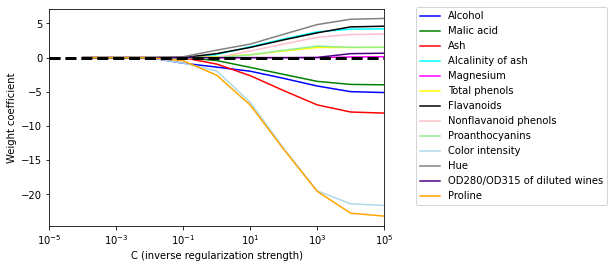

In [128]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

#plt.savefig('figures/04_08.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)

plt.show()

## What is future selection?

- When working with a large dataset, modelling can be time consuming to run because of number of features. 

- It is not uncommon to have hundreds of features for a model. 

- Then it is critical to weed out irrelevant and subpar features. This is when the concept of feature selection comes into play

> Definition: Feature selection is the process of selecting a subset of most relevant predicting features for use in machine learning model building

<center>

<img alt="Text generation" width="400" caption="Generating text from an input sequence by adding a new word to the input at each step" src="2022-08-14-11-32-03.png" id="text-generation"/> 

</center>


<center>

<img alt="Text generation" width="600" caption="Generating text from an input sequence by adding a new word to the input at each step" src="2022-08-14-11-36-34.png" id="text-generation"/> 

</center>


In [131]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.6, solver='liblinear', multi_class='ovr')

# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.

lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


We will vary the regularization strength and plot the regularization path—the weight coefficients of the different features for different regularization strengths:

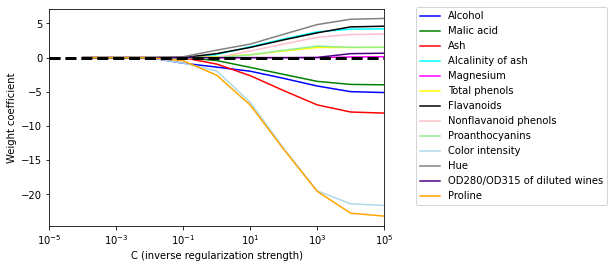

In [96]:
#---------------------------------------------------------------

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']
#----------------------------------------------------------------
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
#----------------------------------------------------------------
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

#plt.savefig('figures/04_08.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)

plt.show()

The resulting plot provides us with further insights into the behavior of L1 regularization. 

As we can see, all feature weights will be zero if we penalize the model with a strong regularization parameter (C < 0.01); C is the inverse of the regularization parameter, 𝜆𝜆:

## Sequential feature selection algorithms

- An alternative way to reduce the complexity of the model and avoid overfitting is dimensionality reduction via feature selection, which is especially useful for unregularized models. 
  
- There are two main categories of **dimensionality reduction techniques**: 
  
  1. feature selection :  we select a subset of the original features
  
  2. feature extraction. we derive information from the feature set to construct a new feature subspace

> Sequential feature selection algorithms are a family of **greedy search algorithms** that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k<d.

What is Greedy Algorithms?

> Greedy algorithms make locally optimal choices at each stage of a combinatorial search problem and generally yield a suboptimal solution to the problem, in contrast to exhaustive search algorithms, which evaluate all possible combinations and are guaranteed to find the optimal solution. However, in practice, an exhaustive search is often computationally not feasible, whereas greedy algorithms allow for a less complex, computationally more efficient solution.

Why do we select some feature? 

- The motivation behind feature selection algorithms is to automatically select a subset of features that are most relevant to the problem, to improve computational efficiency, or to reduce the generalization error of the model by removing irrelevant features or noise, which can be useful for algorithms that don’t support regularization
- A classic sequential feature selection algorithm is sequential backward selection (SBS)


To practice our coding skills and ability to implement our own sequential backward selection (SBS) algorithms, let’s go ahead and implement it in Python from scratch:

In [133]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

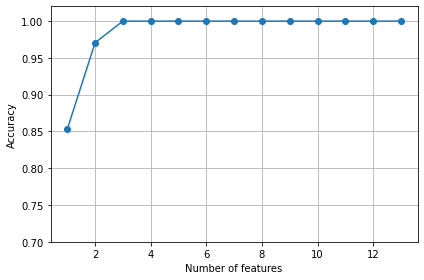

In [135]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

In [116]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Flavanoids', 'Proline'], dtype='object')


In [108]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.9774436090225563
Test accuracy: 0.9333333333333333


In [109]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9548872180451128
Test accuracy: 0.9111111111111111


## Feature Selection in Sklearn

- There are many more feature selection algorithms available via scikit-learn : https://scikit-learn.org/stable/modules/feature_selection.html

# Assessing feature importance with Random Forests

- We have seen how to use L1 regularization to zero out irrelevant features via logistic regression and how to use the SBS algorithm for feature selection and apply it to a KNN algorithm

- Another useful approach for selecting relevant features from a dataset is using a random forest, an ensemble technique.

- The random forest implementation in scikit-learn already collects the feature importance values for us so that we can access them via the **feature_importances_** attribute


In [136]:
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [138]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
importances

array([0.11479722, 0.02886796, 0.01438168, 0.02590012, 0.03192218,
       0.05082481, 0.15967893, 0.0129924 , 0.02248346, 0.14907324,
       0.07259492, 0.1222311 , 0.19425197])

In [148]:
indices = np.argsort(importances)[::-1]


array([12,  6,  9, 11,  0, 10,  5,  4,  1,  3,  8,  2,  7])

In [154]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.194252
 2) Flavanoids                     0.159679
 3) Color intensity                0.149073
 4) OD280/OD315 of diluted wines   0.122231
 5) Alcohol                        0.114797
 6) Hue                            0.072595
 7) Total phenols                  0.050825
 8) Magnesium                      0.031922
 9) Malic acid                     0.028868
10) Alcalinity of ash              0.025900
11) Proanthocyanins                0.022483
12) Ash                            0.014382
13) Nonflavanoid phenols           0.012992


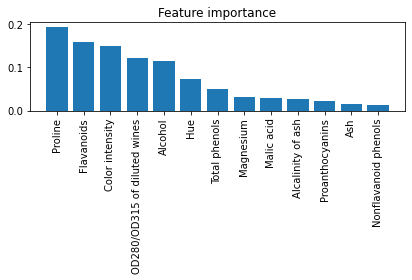

In [156]:
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

-  We can conclude that the proline and flavonoid levels, the color intensity, the OD280/OD315 diffraction, and the alcohol concentration of wine are the most discriminative features in the dataset based on the average impurity decrease in the 500 decision trees. 

- Interestingly, two of the top-ranked features in the plot are also in the three-feature subset selection from the SBS algorithm that we implemented in the previous section (alcohol concentration and OD280/OD315 of diluted wines).

Note

> As far as interpretability is concerned, the random forest technique comes with an important gotcha that is worth mentioning. If two or more features are highly correlated, one feature may be ranked very highly while the information on the other feature(s) may not be fully captured. On the other hand, we don’t need to be concerned about this problem if we are merely interested in

# Summary

- We started this chapter by looking at useful techniques to make sure that we handle missing data correctly. 

- Before we feed data to a machine learning algorithm, we also have to make sure that we encode categorical variables correctly, and in this chapter, we saw how we can map ordinal and nominal feature values to integer representations.  

- we briefly discussed L1 regularization, which can help us to avoid overfitting by reducing the complexity of a model. 

- As an alternative approach to removing irrelevant features, we used a sequential feature selection algorithm to select meaningful features from a dataset. 

- In the next chapter, you will learn about yet another useful approach to dimensionality reduction: feature extraction. It allows us to compress features onto a lower-dimensional subspace, rather than removing features entirely as in feature selection.

...

---

Readers may ignore the next cell.

In [87]:
! python ../.convert_notebook_to_script.py --input ch04.ipynb --output ch04.py

python: can't open file '/Users/shmuhammad/Document/VSCode/bookclub/ml-with-pytorch-sklearn/chapters/ch04/../.convert_notebook_to_script.py': [Errno 2] No such file or directory
